# Code Challenge - Data Cleaning & Preparation - Task 2

***
*Author: Kadriye Nur Bakirci*
***
Contact regarding the code: nur.bakirci@gmail.com
***

This notebook gets more insights about monthly sales and shows the comparison between trial and control stores by using the dataset that is created in Task 1.

This notebook is divided into 3 main sections.



1.   **Environment Setup**
2.   **Exploratory Data Analysis**
3.   **Data Preparation & Feature Engineering**

[Datasets Location](https://github.com/kadnur/DataCleaningPreparation/tree/main/Data)

## Prepare the Environment

### Import Libraries

General Use Libraries

In [1]:
# Import important libraries
import pandas as pd
from google.colab import files
import numpy as np
from datetime import datetime, timedelta
import re
from collections import Counter

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

# Library for t-test
import scipy.stats as stats

# Define some rules of displaying DataFrame
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', None)

### Import the Data

Clone repository containing the data.

In [2]:
# Clone the repo containing the raw data
!git clone -l -s https://github.com/kadnur/DataCleaningPreparation.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 2), reused 8 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 15.60 MiB | 14.63 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
# Move to the relative path containing the cloned repo's data
%cd cloned-repo/Data
!ls

/content/cloned-repo/Data
QVI_data.csv  QVI_purchase_behaviour.csv  QVI_transaction_data.xlsx


Convert the dataset file into Pandas Dataframe.

**DataFrame** : *QVI_data*

In [4]:
# Read QVI_data excel data file
QVI_data = pd.read_csv('QVI_data.csv')

## Exploratory Data Analysis

### QVI data - Analysis

Explore the first 10 instances of QVI data.

In [5]:
# Check the head as a sanity check of correct loading of the data
QVI_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,GRAMS,BRAND_NAME,MONTH,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380,Smiths,7,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken,2,7.4,134,Pringles,7,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,55,55073,48884,91,CCs Tasty Cheese,2,4.2,175,CCs,7,MIDAGE SINGLES/COUPLES,Budget
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil and Pesto,2,10.8,175,Kettle,7,MIDAGE SINGLES/COUPLES,Budget
4,2018-07-01,68,68193,65598,44,Thins Chips Lightand Tangy,2,6.6,175,Thins,7,MIDAGE SINGLES/COUPLES,Budget
5,2018-07-01,69,69207,67156,49,Infuzions SourCreamandHerbs Veg Strws,2,7.6,110,Infuzions,7,MIDAGE SINGLES/COUPLES,Budget
6,2018-07-01,104,104017,103795,84,GrainWaves Plus Btroot and Chilli Jam,2,6.2,180,GrainWaves,7,MIDAGE SINGLES/COUPLES,Budget
7,2018-07-01,113,113032,115576,6,RedRockDeli Lime and Pepper,2,6.0,165,RedRockDeli,7,MIDAGE SINGLES/COUPLES,Budget
8,2018-07-01,119,119051,122360,113,Twisties Chicken,2,9.2,270,Twisties,7,MIDAGE SINGLES/COUPLES,Budget
9,2018-07-01,124,124411,128153,13,RedRockDeli Thai ChilliandLime,1,2.7,150,RedRockDeli,7,MIDAGE SINGLES/COUPLES,Budget


Get an overall insight on QVI data dataframe content.

In [6]:
# Get the shape of the DataFrame
print(f'Dataset shape:\n{QVI_data.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{QVI_data.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{QVI_data.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{QVI_data.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{QVI_data.describe(include = object).transpose()}')

Dataset shape:
(249668, 13)

Dataset attributes:
Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'GRAMS', 'BRAND_NAME', 'MONTH',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249668 entries, 0 to 249667
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              249668 non-null  object 
 1   STORE_NBR         249668 non-null  int64  
 2   LYLTY_CARD_NBR    249668 non-null  int64  
 3   TXN_ID            249668 non-null  int64  
 4   PROD_NBR          249668 non-null  int64  
 5   PROD_NAME         249668 non-null  object 
 6   PROD_QTY          249668 non-null  int64  
 7   TOT_SALES         249668 non-null  float64
 8   GRAMS             249668 non-null  int64  
 9   BRAND_NAME        249668 non-null  object 
 10  MONTH             249668 non-null  int64  
 11  LI

Do a direct call for printing missing values.

In [7]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((QVI_data.isnull().sum() / len(QVI_data))) * 100}\n')

Percentage of Null Values per Feature
DATE                0.0
STORE_NBR           0.0
LYLTY_CARD_NBR      0.0
TXN_ID              0.0
PROD_NBR            0.0
PROD_NAME           0.0
PROD_QTY            0.0
TOT_SALES           0.0
GRAMS               0.0
BRAND_NAME          0.0
MONTH               0.0
LIFESTAGE           0.0
PREMIUM_CUSTOMER    0.0
dtype: float64



## Data Preprocessing & Feature Engineering

Create copy of the raw data before making transformations.

In [8]:
# Make a copy of the raw datasets to keep the original information untouched
df_QVI_data= QVI_data.copy()

### Duplicated Instances

Check the number of duplicated rows in DataFrame.

In [9]:
# Print the number of duplicated rows for df_QVI_data
print(f'The number of duplicated rows in logs DataFrame is {df_QVI_data.duplicated().sum()} out of {df_QVI_data.shape[0]} rows.')

The number of duplicated rows in logs DataFrame is 0 out of 249668 rows.


There is no duplicated rows so that we can move our analysis.

### Create New Feature

Create new feature which extracts the informatin from date column and saves as YYYY-MM.

In [10]:
# Convert the 'date' column to datetime format
df_QVI_data['DATE'] = pd.to_datetime(df_QVI_data['DATE'])

# Extract the month and year from the 'date' column
df_QVI_data['MONTH_YEAR'] = pd.to_datetime(df_QVI_data['DATE']).dt.to_period('M')

In [11]:
# Check DataFrame
df_QVI_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,GRAMS,BRAND_NAME,MONTH,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_YEAR
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380,Smiths,7,MIDAGE SINGLES/COUPLES,Budget,2018-07
1,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken,2,7.4,134,Pringles,7,MIDAGE SINGLES/COUPLES,Budget,2018-07
2,2018-07-01,55,55073,48884,91,CCs Tasty Cheese,2,4.2,175,CCs,7,MIDAGE SINGLES/COUPLES,Budget,2018-07
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil and Pesto,2,10.8,175,Kettle,7,MIDAGE SINGLES/COUPLES,Budget,2018-07
4,2018-07-01,68,68193,65598,44,Thins Chips Lightand Tangy,2,6.6,175,Thins,7,MIDAGE SINGLES/COUPLES,Budget,2018-07


### Drop the Observation

From Task 1 , we added one missing date in our dataset. Now drop this row because it will not provide any information.

In [12]:
# Drop the row that contains no information
df_QVI_data = df_QVI_data.loc[df_QVI_data['DATE'] != '2018-12-25']

### Create Metrics

We want to create metrics that calculate for each store and month total sales, number of customers, transactions per customer, chips per customer, and the average price per unit.


In [13]:
# Calculate total sales, number of customers, transactions per customer, chips per customer, and average price per unit
df_metrics = df_QVI_data.groupby(['STORE_NBR', 'MONTH_YEAR']).agg(
    TOTAL_SALES=('TOT_SALES', 'sum'),
    NUM_CUSTOMERS=('LYLTY_CARD_NBR', 'nunique'),
    TRANSACTIONS_PER_CUSTOMER=('TXN_ID', 'count'),
    CHIPS_PER_CUSTOMER=('PROD_QTY', 'sum'),
    AVG_PRICE_PER_UNIT=('TOT_SALES', 'mean')
                                                               ).reset_index()

In [14]:
# Check Metrics
df_metrics

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT
0,1,2018-07,191.6,48,50,59,3.832000
1,1,2018-08,168.4,41,41,52,4.107317
2,1,2018-09,268.1,57,59,71,4.544068
3,1,2018-10,178.0,40,41,52,4.341463
4,1,2018-11,187.5,45,46,56,4.076087
...,...,...,...,...,...,...,...
3161,272,2019-02,385.3,44,47,89,8.197872
3162,272,2019-03,421.9,48,51,97,8.272549
3163,272,2019-04,445.1,54,56,105,7.948214
3164,272,2019-05,314.6,34,40,71,7.865000


Filter to the pre-trial period and stores with full observation periods.

In [15]:
# Create a new DataFrame with the filter
StoreswithFullObs = df_metrics[(df_metrics['STORE_NBR'] != 77)&(df_metrics['STORE_NBR'] != 86)&(df_metrics['STORE_NBR'] != 88)&(df_metrics['MONTH_YEAR'] < '2019-02')]

In [16]:
# Check the DataFrame
StoreswithFullObs

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT
0,1,2018-07,191.6,48,50,59,3.832000
1,1,2018-08,168.4,41,41,52,4.107317
2,1,2018-09,268.1,57,59,71,4.544068
3,1,2018-10,178.0,40,41,52,4.341463
4,1,2018-11,187.5,45,46,56,4.076087
...,...,...,...,...,...,...,...
3156,272,2018-09,294.5,31,35,69,8.414286
3157,272,2018-10,405.1,41,48,94,8.439583
3158,272,2018-11,355.8,39,43,83,8.274419
3159,272,2018-12,363.1,43,43,81,8.444186


We must determine the ranking of potential control stores and the correlation of their performance to the trial store to determine their similarity.

In [17]:
# Create function to calculate correlation between trial stores and control stores
def calculate_correlation(trial_store, measure):
  """
    Calculate the performance difference between the trial store and a control store based on a specified measure.

    Parameters:
    - trial_store (int): The trial store number.
    - measure (str): The measure for which correlation is calculated (e.g., 'total_sales').

    Returns:
    - DataFrame: The correlation coefficient with all control stores.
  """
  results = []

  for control_store in StoreswithFullObs['STORE_NBR'].unique():
      trial_data = df_metrics[(df_metrics['STORE_NBR'] == trial_store) & (df_metrics['MONTH_YEAR'] < '2019-02')][['MONTH_YEAR', measure]]
      control_data = StoreswithFullObs[(StoreswithFullObs['STORE_NBR'] == control_store)][['MONTH_YEAR', measure]]

      merged_data = pd.merge(trial_data, control_data, on='MONTH_YEAR', suffixes=('_trial', '_control'))

      correlation = merged_data[measure + '_trial'].corr(merged_data[measure + '_control'])

      results.append({'Control_Store': control_store, 'Correlation': correlation})

  results_df = pd.DataFrame(results)

  return results_df

A standardized metric can be calculated by comparing the absolute difference between the trial store's performance and each control store's performance.

In [18]:
# Create function to calculate the performance difference between trial stores and control stores
def calculate_difference(trial_store, measure):
  """
    Calculate the performance difference between the trial store and a control store based on a specified measure.

    Parameters:
    - trial_store (int): The trial store number.
    - measure (str): The measure for which correlation is calculated (e.g., 'total_sales').

    Returns:
    - DataFrame: The standardized distance with all control stores.
  """
  results = []

  for control_store in StoreswithFullObs['STORE_NBR'].unique():
      trial_data = df_metrics[(df_metrics['STORE_NBR'] == trial_store) & (df_metrics['MONTH_YEAR'] < '2019-02')][['MONTH_YEAR', measure]]
      control_data = StoreswithFullObs[(StoreswithFullObs['STORE_NBR'] == control_store)][['MONTH_YEAR', measure]]

      merged_data = pd.merge(trial_data, control_data, on='MONTH_YEAR', suffixes=('_trial', '_control'))

      # Calculate absolute difference
      absolute_difference = abs(merged_data[measure + '_trial'] - merged_data[measure + '_control'])

      # Calculate standardized magnitude distance
      standardized_distance = absolute_difference.mean() / absolute_difference.std()

      # Normalize the result to be between 0 and 1
      normalized_distance = 1 / (1 + standardized_distance)

      results.append({'Control_Store': control_store, 'Distance': normalized_distance})

  results_df = pd.DataFrame(results)

  return results_df

#### Trian Store 77

Use the function you created to calculate correlations against
store 77 using total sales and number of customers.

In [ ]:
# Compare trial store 77 against control stores
total_sales_77_corr = calculate_correlation(77, 'TOTAL_SALES')
total_sales_77_diff = calculate_difference(77,'TOTAL_SALES')
number_cust_77_corr = calculate_correlation(77, 'NUM_CUSTOMERS')
number_cust_77_diff = calculate_difference(77, 'NUM_CUSTOMERS')

To rank, we must combine all the scores calculated using our function into a composite score.

In [20]:
# Merge 2 scores dataset for total sales
merged_scores_sales = pd.merge(total_sales_77_corr, total_sales_77_diff, on='Control_Store')

# Calculate the composed of correlation and magnitude
merged_scores_sales['Combined Score Sales'] = 0.5 * merged_scores_sales['Correlation'] + 0.5 * merged_scores_sales['Distance']

# Merge 2 scores dataset for customer number
merged_scores_cust = pd.merge(number_cust_77_corr, number_cust_77_diff, on='Control_Store')

# Calculate the composed of correlation and magnitude
merged_scores_cust['Combined Score Customers'] = 0.5 * merged_scores_cust['Correlation'] + 0.5 * merged_scores_cust['Distance']

We have scores for total sales and customers, and we can combine them using a simple average.

In [21]:
# Merge 2 scores dataset
merged_scores = pd.merge(merged_scores_sales, merged_scores_cust, on='Control_Store')

# Calculate the composed of correlation and magnitude
merged_scores['Combined Score'] = 0.5 * merged_scores['Combined Score Sales'] + 0.5 * merged_scores['Combined Score Customers']

# Sort DataFrame
merged_scores = merged_scores.sort_values(by=['Combined Score'], ascending=False)

In [22]:
# Check DataFrame
merged_scores.head()

,Control_Store,Correlation_x,Distance_x,Combined Score Sales,Correlation_y,Distance_y,Combined Score Customers,Combined Score
227,233,0.976651,0.480025,0.728338,0.964970,0.458675,0.711822,0.720080
49,50,0.917940,0.404753,0.661347,0.724430,0.451197,0.587814,0.624580
40,41,0.819951,0.267002,0.543477,0.842018,0.427389,0.634704,0.589090
26,27,0.639292,0.246828,0.443060,0.843828,0.458675,0.651251,0.547156
162,167,0.632974,0.333904,0.483439,0.690130,0.466296,0.578213,0.530826


After discovering a control store, we will visually assess if the drivers were similar before the trial.

In [23]:
# Create DataFrame for visualization
visual_data = df_metrics[((df_metrics['STORE_NBR'] == 77) | (df_metrics['STORE_NBR'] == 233)) & (df_metrics['MONTH_YEAR'] < '2019-02')]

In [24]:
# Check DataFrame
visual_data

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT
880,77,2018-07,273.8,48,52,79,5.265385
881,77,2018-08,252.9,47,47,73,5.380851
882,77,2018-09,222.2,41,43,68,5.167442
883,77,2018-10,194.3,36,37,50,5.251351
884,77,2018-11,224.9,39,42,63,5.354762
885,77,2018-12,260.6,43,46,69,5.665217
886,77,2019-01,201.4,34,38,63,5.300000
2696,233,2018-07,284.7,50,52,84,5.475000
2697,233,2018-08,266.1,44,46,74,5.784783
2698,233,2018-09,220.9,40,43,68,5.137209


Plot total sales per month.

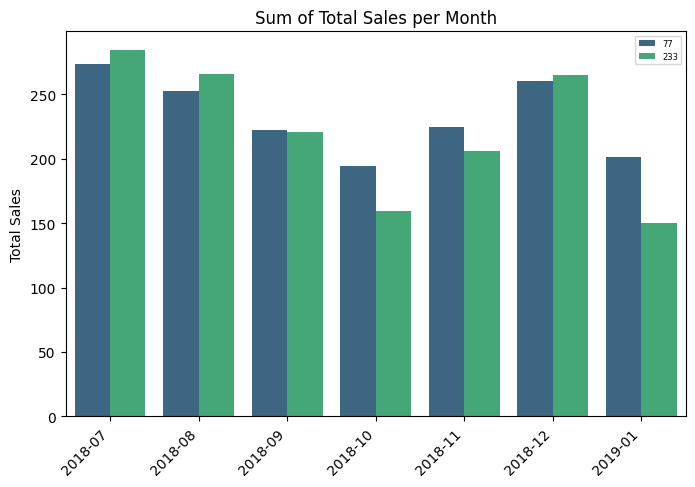

In [25]:
# Plotting sum of total sales per month
plt.figure(figsize=(8, 5))
sns.barplot(x='MONTH_YEAR', y='TOTAL_SALES', data=visual_data, estimator='sum', errorbar=None, hue='STORE_NBR',palette='viridis')

# Customize the plot
plt.title('Sum of Total Sales per Month')
plt.ylabel('Total Sales')
plt.xlabel(None)
plt.legend(loc ="upper right",  prop = { "size": 6 })

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

Plot number of customers per month.

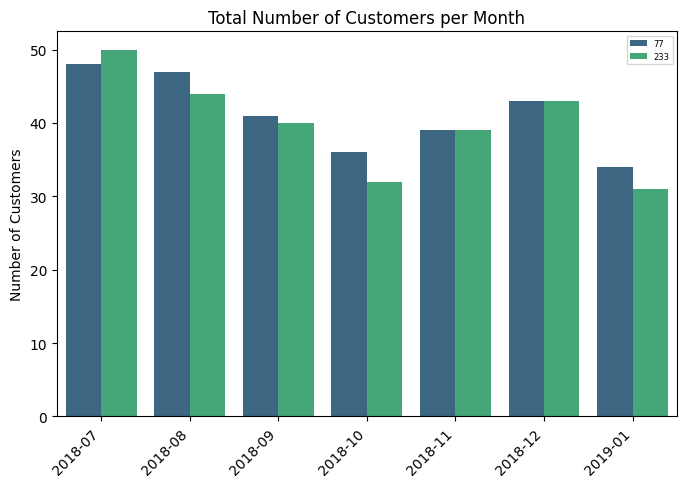

In [26]:
# Plotting number of customers per month
plt.figure(figsize=(8, 5))
sns.barplot(x='MONTH_YEAR', y='NUM_CUSTOMERS', data=visual_data, estimator='sum', errorbar=None, hue='STORE_NBR',palette='viridis')

# Customize the plot
plt.title('Total Number of Customers per Month')
plt.ylabel('Number of Customers')
plt.xlabel(None)
plt.legend(loc ="upper right",  prop = { "size": 6 })

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

We will begin by adjusting the control store's sales to a level similar to the control store, excluding any differences outside the trial period.

 Scale pre-trial control sales to match pre-trial trial store sales.

In [27]:
# Selecting the pre-trial period data for the control store (store 233)
pre_trial_control = df_metrics[(df_metrics['STORE_NBR'] == 233) & (df_metrics['MONTH_YEAR'] < '02-2019')]

# Selecting the pre-trial period data for the trial store (store 77)
pre_trial_trial = df_metrics[(df_metrics['STORE_NBR'] == 77) & (df_metrics['MONTH_YEAR'] < '02-2019')]

# Calculating the scaling factor to match control store sales to trial store sales
scaling_factor = pre_trial_trial['TOTAL_SALES'].sum() / pre_trial_control['TOTAL_SALES'].sum()

# Apply the scaling factor
measure_over_time_sales = df_metrics.copy()
measure_over_time_sales['controlSales'] = measure_over_time_sales.loc[
    measure_over_time_sales['STORE_NBR'] == 233, 'TOTAL_SALES'
] * scaling_factor

In [28]:
measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 233]

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT,controlSales
2696,233,2018-07,284.7,50,52,84,5.475000,298.757223
2697,233,2018-08,266.1,44,46,74,5.784783,279.238837
2698,233,2018-09,220.9,40,43,68,5.137209,231.807062
2699,233,2018-10,159.3,32,32,48,4.978125,167.165527
2700,233,2018-11,206.5,39,40,61,5.162500,216.696054
2701,233,2018-12,265.4,43,45,70,5.897778,278.504274
2702,233,2019-01,150.5,31,31,41,4.854839,157.931022
2703,233,2019-02,228.7,43,45,67,5.082222,239.992191
2704,233,2019-03,180.6,35,36,52,5.016667,189.517227
2705,233,2019-04,144.2,27,29,41,4.972414,151.319956


Calculate the percentage difference between scaled control sales
and trial sales.

In [29]:
# Assuming you have a DataFrame named measure_over_time_sales

# Find the indices for the control and trial stores
control_index = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 233].index
trial_index = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 77].index

# Calculate the percentage difference
measure_over_time_sales.loc[control_index, 'PERCENTAGE_DIFF'] = (measure_over_time_sales.loc[trial_index, 'TOTAL_SALES'].values - measure_over_time_sales.loc[control_index, 'controlSales'].values) / measure_over_time_sales.loc[control_index, 'controlSales'].values * 100

In [30]:
measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 233]

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT,controlSales,PERCENTAGE_DIFF
2696,233,2018-07,284.7,50,52,84,5.475000,298.757223,-8.353680
2697,233,2018-08,266.1,44,46,74,5.784783,279.238837,-9.432369
2698,233,2018-09,220.9,40,43,68,5.137209,231.807062,-4.144422
2699,233,2018-10,159.3,32,32,48,4.978125,167.165527,16.232098
2700,233,2018-11,206.5,39,40,61,5.162500,216.696054,3.785923
2701,233,2018-12,265.4,43,45,70,5.897778,278.504274,-6.428725
2702,233,2019-01,150.5,31,31,41,4.854839,157.931022,27.524027
2703,233,2019-02,228.7,43,45,67,5.082222,239.992191,-7.413654
2704,233,2019-03,180.6,35,36,52,5.016667,189.517227,34.605178
2705,233,2019-04,144.2,27,29,41,4.972414,151.319956,74.134335


The standard deviation is calculated based on the scaled percentage difference in the pre-trial period, as the null hypothesis suggests the trial period is identical.

In [31]:
# Calculate the standard deviation based on the scaled percentage difference in the pre-trial period
std_dev = measure_over_time_sales.loc[measure_over_time_sales['MONTH_YEAR'] < '02-2019', 'PERCENTAGE_DIFF'].std()

# Number of months in the pre-trial period
num_months = 8

# Degrees of freedom
degrees_of_freedom = num_months - 1

# Calculate t-values for the trial months
measure_over_time_sales['tValue'] = (measure_over_time_sales[(measure_over_time_sales['MONTH_YEAR'] >= '02-2019') & (measure_over_time_sales['MONTH_YEAR'] <= '04-2019')]['PERCENTAGE_DIFF'] - 0) / std_dev

# Find the 95th percentile of the t distribution
critical_value = stats.t.ppf(0.95, degrees_of_freedom)

# Check whether the hypothesis is statistically significant
measure_over_time_sales['Hypothesis_Test'] = abs(measure_over_time_sales['tValue']) > critical_value

In [32]:
measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 233]

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT,controlSales,PERCENTAGE_DIFF,tValue,Hypothesis_Test
2696,233,2018-07,284.7,50,52,84,5.475000,298.757223,-8.353680,NaN,False
2697,233,2018-08,266.1,44,46,74,5.784783,279.238837,-9.432369,NaN,False
2698,233,2018-09,220.9,40,43,68,5.137209,231.807062,-4.144422,NaN,False
2699,233,2018-10,159.3,32,32,48,4.978125,167.165527,16.232098,NaN,False
2700,233,2018-11,206.5,39,40,61,5.162500,216.696054,3.785923,NaN,False
2701,233,2018-12,265.4,43,45,70,5.897778,278.504274,-6.428725,NaN,False
2702,233,2019-01,150.5,31,31,41,4.854839,157.931022,27.524027,NaN,False
2703,233,2019-02,228.7,43,45,67,5.082222,239.992191,-7.413654,-0.524208,False
2704,233,2019-03,180.6,35,36,52,5.016667,189.517227,34.605178,2.446878,True
2705,233,2019-04,144.2,27,29,41,4.972414,151.319956,74.134335,5.241924,True



The t-value for March and April is significantly higher than the 95th percentile value of the t-distribution, indicating a statistically significant increase in sales in the trial store compared to the control store.


Create a visual representation by plotting control store sales, trial store sales, and the 95th percentile value of control store sales.

In [33]:
# Create new DataFrame
measure_over_time_sales_new = measure_over_time_sales[(measure_over_time_sales['STORE_NBR'] == 77) | (measure_over_time_sales['STORE_NBR'] == 233)][['STORE_NBR','MONTH_YEAR','TOTAL_SALES']]

In [34]:
# Control store 95th percentile
past_sales_controls_95 = measure_over_time_sales_new[measure_over_time_sales_new['STORE_NBR'] == 233].copy()
past_sales_controls_95['totSales'] = past_sales_controls_95['TOTAL_SALES'] * (1 + std_dev * 2)
past_sales_controls_95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
past_sales_controls_5 = measure_over_time_sales_new[measure_over_time_sales_new['STORE_NBR'] == 233].copy()
past_sales_controls_5['totSales'] = past_sales_controls_5['TOTAL_SALES'] * (1 - std_dev * 2)
past_sales_controls_5['Store_type'] = 'Control 5th % confidence interval'

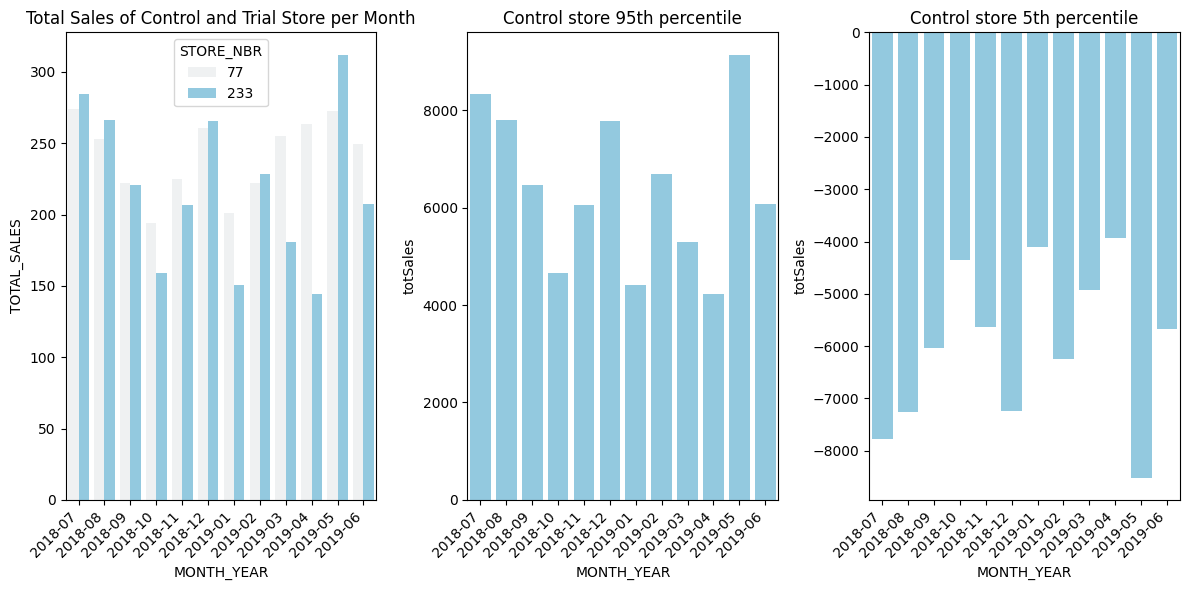

In [35]:
# Create plots for each column
plt.figure(figsize=(12, 6))

# First plot
plt.subplot(1, 3, 1)
sns.barplot(x='MONTH_YEAR', y='TOTAL_SALES', data=measure_over_time_sales_new, hue='STORE_NBR', estimator=sum,errorbar=None, color='skyblue')
plt.title('Total Sales of Control and Trial Store per Month')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Second plot
plt.subplot(1, 3, 2)
sns.barplot(x='MONTH_YEAR', y='totSales', data=past_sales_controls_95, estimator=sum,errorbar=None, color='skyblue')
plt.title('Control store 95th percentile')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Third plot
plt.subplot(1, 3, 3)
sns.barplot(x='MONTH_YEAR', y='totSales', data=past_sales_controls_5, estimator=sum,errorbar=None, color='skyblue')
plt.title('Control store 5th percentile')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.


##### Customer Number

Let's have a look at assessing this for number of customers as well.

In [36]:
# Selecting the pre-trial period data for the control store (store 233)
pre_trial_control = df_metrics[(df_metrics['STORE_NBR'] == 233) & (df_metrics['MONTH_YEAR'] < '02-2019')]

# Selecting the pre-trial period data for the trial store (store 77)
pre_trial_trial = df_metrics[(df_metrics['STORE_NBR'] == 77) & (df_metrics['MONTH_YEAR'] < '02-2019')]

# Calculating the scaling factor to match control store number of customers to trial store number of customers
scaling_factor = pre_trial_trial['NUM_CUSTOMERS'].sum() / pre_trial_control['NUM_CUSTOMERS'].sum()

# Apply the scaling factor
measure_over_time_num_cust = df_metrics.copy()
measure_over_time_num_cust['controlCustNum'] = measure_over_time_num_cust.loc[
    measure_over_time_num_cust['STORE_NBR'] == 233, 'NUM_CUSTOMERS'
] * scaling_factor

In [37]:
# Assuming you have a DataFrame named measure_over_time_sales

# Find the indices for the control and trial stores
control_index = measure_over_time_num_cust[measure_over_time_num_cust['STORE_NBR'] == 233].index
trial_index = measure_over_time_num_cust[measure_over_time_num_cust['STORE_NBR'] == 77].index

# Calculate the percentage difference
measure_over_time_num_cust.loc[control_index, 'PERCENTAGE_DIFF'] = (measure_over_time_num_cust.loc[trial_index, 'NUM_CUSTOMERS'].values - measure_over_time_num_cust.loc[control_index, 'controlCustNum'].values) / measure_over_time_num_cust.loc[control_index, 'controlCustNum'].values * 100

In [38]:
measure_over_time_num_cust[measure_over_time_num_cust['STORE_NBR'] == 233]

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT,controlCustNum,PERCENTAGE_DIFF
2696,233,2018-07,284.7,50,52,84,5.475000,51.612903,-7.000000
2697,233,2018-08,266.1,44,46,74,5.784783,45.419355,3.480114
2698,233,2018-09,220.9,40,43,68,5.137209,41.290323,-0.703125
2699,233,2018-10,159.3,32,32,48,4.978125,33.032258,8.984375
2700,233,2018-11,206.5,39,40,61,5.162500,40.258065,-3.125000
2701,233,2018-12,265.4,43,45,70,5.897778,44.387097,-3.125000
2702,233,2019-01,150.5,31,31,41,4.854839,32.000000,6.250000
2703,233,2019-02,228.7,43,45,67,5.082222,44.387097,-3.125000
2704,233,2019-03,180.6,35,36,52,5.016667,36.129032,27.321429
2705,233,2019-04,144.2,27,29,41,4.972414,27.870968,68.634259


In [39]:
# Calculate the standard deviation based on the scaled percentage difference in the pre-trial period
std_dev = measure_over_time_num_cust.loc[measure_over_time_num_cust['MONTH_YEAR'] < '02-2019', 'PERCENTAGE_DIFF'].std()

# Number of months in the pre-trial period
num_months = 8

# Degrees of freedom
degrees_of_freedom = num_months - 1

# Calculate t-values for the trial months
measure_over_time_num_cust['tValue'] = (measure_over_time_num_cust[(measure_over_time_num_cust['MONTH_YEAR'] >= '02-2019') & (measure_over_time_num_cust['MONTH_YEAR'] <= '04-2019')]['PERCENTAGE_DIFF'] - 0) / std_dev

# Find the 95th percentile of the t distribution
critical_value = stats.t.ppf(0.95, degrees_of_freedom)

# Check whether the hypothesis is statistically significant
measure_over_time_num_cust['Hypothesis_Test'] = abs(measure_over_time_num_cust['tValue']) > critical_value

In [40]:
measure_over_time_num_cust[measure_over_time_num_cust['STORE_NBR'] == 233]

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT,controlCustNum,PERCENTAGE_DIFF,tValue,Hypothesis_Test
2696,233,2018-07,284.7,50,52,84,5.475000,51.612903,-7.000000,NaN,False
2697,233,2018-08,266.1,44,46,74,5.784783,45.419355,3.480114,NaN,False
2698,233,2018-09,220.9,40,43,68,5.137209,41.290323,-0.703125,NaN,False
2699,233,2018-10,159.3,32,32,48,4.978125,33.032258,8.984375,NaN,False
2700,233,2018-11,206.5,39,40,61,5.162500,40.258065,-3.125000,NaN,False
2701,233,2018-12,265.4,43,45,70,5.897778,44.387097,-3.125000,NaN,False
2702,233,2019-01,150.5,31,31,41,4.854839,32.000000,6.250000,NaN,False
2703,233,2019-02,228.7,43,45,67,5.082222,44.387097,-3.125000,-0.544433,False
2704,233,2019-03,180.6,35,36,52,5.016667,36.129032,27.321429,4.759902,True
2705,233,2019-04,144.2,27,29,41,4.972414,27.870968,68.634259,11.957368,True


In [41]:
# Create new DataFrame
measure_over_time_num_cust_new = measure_over_time_num_cust[(measure_over_time_num_cust['STORE_NBR'] == 77) | (measure_over_time_num_cust['STORE_NBR'] == 233)][['STORE_NBR','MONTH_YEAR','NUM_CUSTOMERS']]

# Control store 95th percentile
past_custs_controls_95 = measure_over_time_num_cust_new[measure_over_time_num_cust_new['STORE_NBR'] == 233].copy()
past_custs_controls_95['NumCust'] = past_custs_controls_95['NUM_CUSTOMERS'] * (1 + std_dev * 2)
past_custs_controls_95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
past_custs_controls_5 = measure_over_time_num_cust_new[measure_over_time_num_cust_new['STORE_NBR'] == 233].copy()
past_custs_controls_5['NumCust'] = past_custs_controls_5['NUM_CUSTOMERS'] * (1 - std_dev * 2)
past_custs_controls_5['Store_type'] = 'Control 5th % confidence interval'

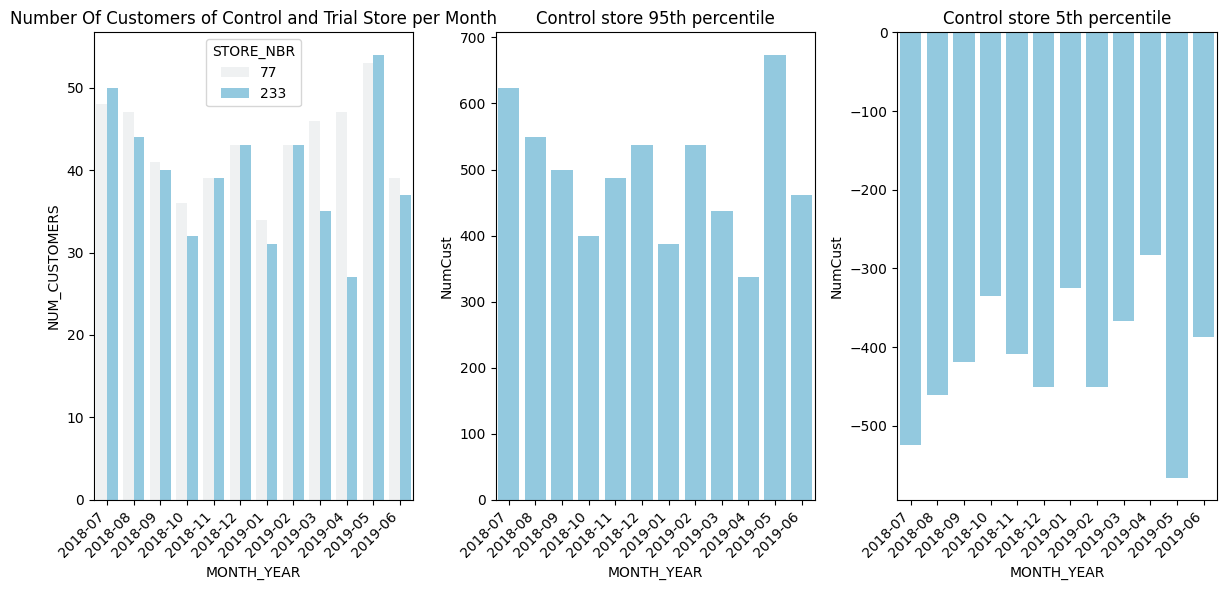

In [42]:
# Create plots for each column
plt.figure(figsize=(12, 6))

# First plot
plt.subplot(1, 3, 1)
sns.barplot(x='MONTH_YEAR', y='NUM_CUSTOMERS', data=measure_over_time_num_cust_new, hue='STORE_NBR', estimator=sum,errorbar=None, color='skyblue')
plt.title('Number Of Customers of Control and Trial Store per Month')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Second plot
plt.subplot(1, 3, 2)
sns.barplot(x='MONTH_YEAR', y='NumCust', data=past_custs_controls_95, estimator=sum,errorbar=None, color='skyblue')
plt.title('Control store 95th percentile')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Third plot
plt.subplot(1, 3, 3)
sns.barplot(x='MONTH_YEAR', y='NumCust', data=past_custs_controls_5, estimator=sum,errorbar=None, color='skyblue')
plt.title('Control store 5th percentile')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Trial Store 86

Repeat all the processes for the trial store 86.

In [ ]:
# Compare trial store 86 against control stores
total_sales_86_corr = calculate_correlation(86, 'TOTAL_SALES')
total_sales_86_diff = calculate_difference(86,'TOTAL_SALES')
number_cust_86_corr = calculate_correlation(86, 'NUM_CUSTOMERS')
number_cust_86_diff = calculate_difference(86, 'NUM_CUSTOMERS')

In [45]:
# Merge 2 scores dataset for total sales
merged_scores_sales = pd.merge(total_sales_86_corr, total_sales_86_diff, on='Control_Store')

# Calculate the composed of correlation and magnitude
merged_scores_sales['Combined Score Sales'] = 0.5 * merged_scores_sales['Correlation'] + 0.5 * merged_scores_sales['Distance']

# Merge 2 scores dataset for customer number
merged_scores_cust = pd.merge(number_cust_86_corr, number_cust_86_diff, on='Control_Store')

# Calculate the composed of correlation and magnitude
merged_scores_cust['Combined Score Customers'] = 0.5 * merged_scores_cust['Correlation'] + 0.5 * merged_scores_cust['Distance']

In [46]:
# Merge 2 scores dataset
merged_scores = pd.merge(merged_scores_sales, merged_scores_cust, on='Control_Store')

# Calculate the composed of correlation and magnitude
merged_scores['Combined Score'] = 0.5 * merged_scores['Combined Score Sales'] + 0.5 * merged_scores['Combined Score Customers']

# Sort DataFrame
merged_scores = merged_scores.sort_values(by=['Combined Score'], ascending=False)

In [47]:
# Check DataFrame
merged_scores.head()

,Control_Store,Correlation_x,Distance_x,Combined Score Sales,Correlation_y,Distance_y,Combined Score Customers,Combined Score
109,114,0.797520,0.443786,0.620653,0.875624,0.383411,0.629517,0.625085
150,155,0.852169,0.450248,0.651209,0.824667,0.355154,0.589910,0.620560
55,56,0.795140,0.238262,0.516701,0.799344,0.256347,0.527845,0.522273
133,138,0.769530,0.424814,0.597172,0.555367,0.307689,0.431528,0.514350
123,128,0.710693,0.367525,0.539109,0.539160,0.401432,0.470296,0.504702


In [53]:
# Create DataFrame for visualization
visual_data = df_metrics[((df_metrics['STORE_NBR'] == 86) | (df_metrics['STORE_NBR'] == 114)) & (df_metrics['MONTH_YEAR'] < '2019-02')]

In [49]:
# Check DataFrame
visual_data

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT
977,86,2018-07,861.40,95,122,243,7.060656
978,86,2018-08,737.65,93,108,207,6.830093
979,86,2018-09,860.40,100,122,244,7.052459
980,86,2018-10,914.60,106,133,266,6.876692
981,86,2018-11,861.80,96,121,242,7.122314
982,86,2018-12,822.80,95,117,234,7.032479
983,86,2019-01,805.80,89,122,244,6.604918
1302,114,2018-07,918.60,102,130,260,7.066154
1303,114,2018-08,832.65,102,127,233,6.556299
1304,114,2018-09,862.60,103,127,254,6.792126


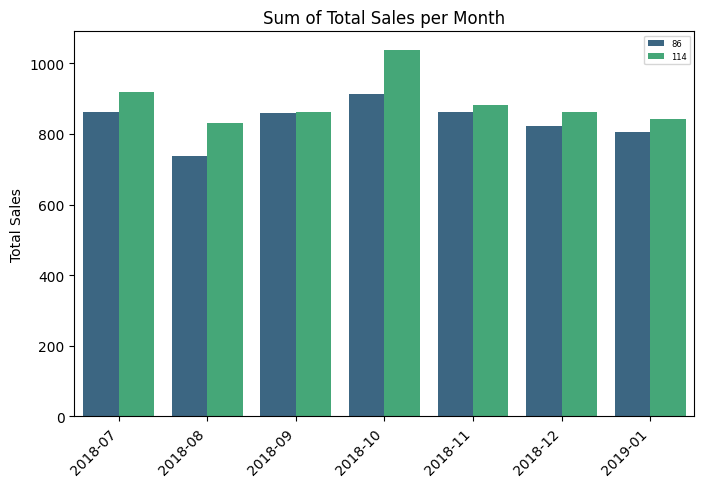

In [54]:
# Plotting sum of total sales per month
plt.figure(figsize=(8, 5))
sns.barplot(x='MONTH_YEAR', y='TOTAL_SALES', data=visual_data, estimator='sum', errorbar=None, hue='STORE_NBR',palette='viridis')

# Customize the plot
plt.title('Sum of Total Sales per Month')
plt.ylabel('Total Sales')
plt.xlabel(None)
plt.legend(loc ="upper right",  prop = { "size": 6 })

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

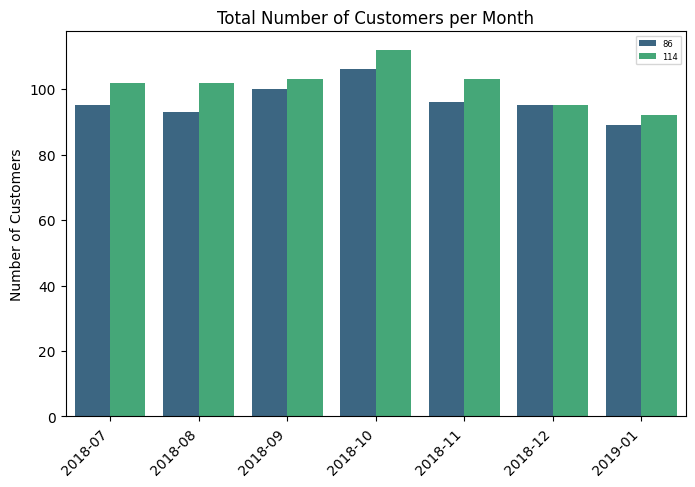

In [55]:
# Plotting number of customers per month
plt.figure(figsize=(8, 5))
sns.barplot(x='MONTH_YEAR', y='NUM_CUSTOMERS', data=visual_data, estimator='sum', errorbar=None, hue='STORE_NBR',palette='viridis')

# Customize the plot
plt.title('Total Number of Customers per Month')
plt.ylabel('Number of Customers')
plt.xlabel(None)
plt.legend(loc ="upper right",  prop = { "size": 6 })

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

In [56]:
# Selecting the pre-trial period data for the control store (store 114)
pre_trial_control = df_metrics[(df_metrics['STORE_NBR'] == 114) & (df_metrics['MONTH_YEAR'] < '02-2019')]

# Selecting the pre-trial period data for the trial store (store 86)
pre_trial_trial = df_metrics[(df_metrics['STORE_NBR'] == 86) & (df_metrics['MONTH_YEAR'] < '02-2019')]

# Calculating the scaling factor to match control store sales to trial store sales
scaling_factor = pre_trial_trial['TOTAL_SALES'].sum() / pre_trial_control['TOTAL_SALES'].sum()

# Apply the scaling factor
measure_over_time_sales = df_metrics.copy()
measure_over_time_sales['controlSales'] = measure_over_time_sales.loc[
    measure_over_time_sales['STORE_NBR'] == 114, 'TOTAL_SALES'
] * scaling_factor

In [57]:
measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 114]

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT,controlSales
1302,114,2018-07,918.60,102,130,260,7.066154,863.418483
1303,114,2018-08,832.65,102,127,233,6.556299,782.631613
1304,114,2018-09,862.60,103,127,254,6.792126,810.782477
1305,114,2018-10,1038.80,112,140,280,7.420000,976.397910
1306,114,2018-11,882.20,103,126,252,7.001587,829.205079
1307,114,2018-12,861.60,95,120,240,7.180000,809.842548
1308,114,2019-01,842.80,92,115,230,7.328696,792.171889
1309,114,2019-02,788.60,89,111,222,7.104505,741.227755
1310,114,2019-03,932.80,109,136,272,6.858824,876.765470
1311,114,2019-04,807.40,96,121,242,6.672727,758.898414


In [58]:
# Assuming you have a DataFrame named measure_over_time_sales

# Find the indices for the control and trial stores
control_index = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 114].index
trial_index = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 86].index

# Calculate the percentage difference
measure_over_time_sales.loc[control_index, 'PERCENTAGE_DIFF'] = (measure_over_time_sales.loc[trial_index, 'TOTAL_SALES'].values - measure_over_time_sales.loc[control_index, 'controlSales'].values) / measure_over_time_sales.loc[control_index, 'controlSales'].values * 100

In [59]:
measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 114]

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT,controlSales,PERCENTAGE_DIFF
1302,114,2018-07,918.60,102,130,260,7.066154,863.418483,-0.233778
1303,114,2018-08,832.65,102,127,233,6.556299,782.631613,-5.747482
1304,114,2018-09,862.60,103,127,254,6.792126,810.782477,6.119708
1305,114,2018-10,1038.80,112,140,280,7.420000,976.397910,-6.329173
1306,114,2018-11,882.20,103,126,252,7.001587,829.205079,3.930864
1307,114,2018-12,861.60,95,120,240,7.180000,809.842548,1.599996
1308,114,2019-01,842.80,92,115,230,7.328696,792.171889,1.720348
1309,114,2019-02,788.60,89,111,222,7.104505,741.227755,19.909163
1310,114,2019-03,932.80,109,136,272,6.858824,876.765470,9.630230
1311,114,2019-04,807.40,96,121,242,6.672727,758.898414,7.313441


In [60]:
# Calculate the standard deviation based on the scaled percentage difference in the pre-trial period
std_dev = measure_over_time_sales.loc[measure_over_time_sales['MONTH_YEAR'] < '02-2019', 'PERCENTAGE_DIFF'].std()

# Number of months in the pre-trial period
num_months = 8

# Degrees of freedom
degrees_of_freedom = num_months - 1

# Calculate t-values for the trial months
measure_over_time_sales['tValue'] = (measure_over_time_sales[(measure_over_time_sales['MONTH_YEAR'] >= '02-2019') & (measure_over_time_sales['MONTH_YEAR'] <= '04-2019')]['PERCENTAGE_DIFF'] - 0) / std_dev

# Find the 95th percentile of the t distribution
critical_value = stats.t.ppf(0.95, degrees_of_freedom)

# Check whether the hypothesis is statistically significant
measure_over_time_sales['Hypothesis_Test'] = abs(measure_over_time_sales['tValue']) > critical_value

In [61]:
measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 114]

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT,controlSales,PERCENTAGE_DIFF,tValue,Hypothesis_Test
1302,114,2018-07,918.60,102,130,260,7.066154,863.418483,-0.233778,NaN,False
1303,114,2018-08,832.65,102,127,233,6.556299,782.631613,-5.747482,NaN,False
1304,114,2018-09,862.60,103,127,254,6.792126,810.782477,6.119708,NaN,False
1305,114,2018-10,1038.80,112,140,280,7.420000,976.397910,-6.329173,NaN,False
1306,114,2018-11,882.20,103,126,252,7.001587,829.205079,3.930864,NaN,False
1307,114,2018-12,861.60,95,120,240,7.180000,809.842548,1.599996,NaN,False
1308,114,2019-01,842.80,92,115,230,7.328696,792.171889,1.720348,NaN,False
1309,114,2019-02,788.60,89,111,222,7.104505,741.227755,19.909163,4.254197,True
1310,114,2019-03,932.80,109,136,272,6.858824,876.765470,9.630230,2.057791,True
1311,114,2019-04,807.40,96,121,242,6.672727,758.898414,7.313441,1.562739,False


In [62]:
# Create new DataFrame
measure_over_time_sales_new = measure_over_time_sales[(measure_over_time_sales['STORE_NBR'] == 86) | (measure_over_time_sales['STORE_NBR'] == 114)][['STORE_NBR','MONTH_YEAR','TOTAL_SALES']]

# Control store 95th percentile
past_sales_controls_95 = measure_over_time_sales_new[measure_over_time_sales_new['STORE_NBR'] == 114].copy()
past_sales_controls_95['totSales'] = past_sales_controls_95['TOTAL_SALES'] * (1 + std_dev * 2)
past_sales_controls_95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
past_sales_controls_5 = measure_over_time_sales_new[measure_over_time_sales_new['STORE_NBR'] == 114].copy()
past_sales_controls_5['totSales'] = past_sales_controls_5['TOTAL_SALES'] * (1 - std_dev * 2)
past_sales_controls_5['Store_type'] = 'Control 5th % confidence interval'

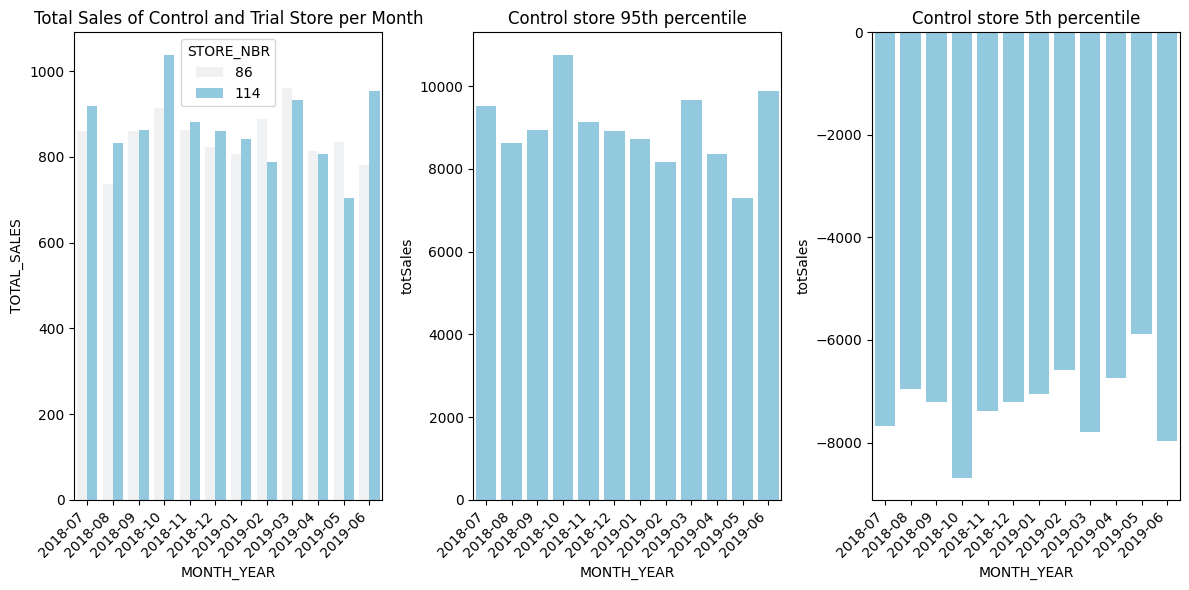

In [63]:
# Create plots for each column
plt.figure(figsize=(12, 6))

# First plot
plt.subplot(1, 3, 1)
sns.barplot(x='MONTH_YEAR', y='TOTAL_SALES', data=measure_over_time_sales_new, hue='STORE_NBR', estimator=sum,errorbar=None, color='skyblue')
plt.title('Total Sales of Control and Trial Store per Month')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Second plot
plt.subplot(1, 3, 2)
sns.barplot(x='MONTH_YEAR', y='totSales', data=past_sales_controls_95, estimator=sum,errorbar=None, color='skyblue')
plt.title('Control store 95th percentile')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Third plot
plt.subplot(1, 3, 3)
sns.barplot(x='MONTH_YEAR', y='totSales', data=past_sales_controls_5, estimator=sum,errorbar=None, color='skyblue')
plt.title('Control store 5th percentile')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The results show that the trial in store 86 is not significantly different to its control store in the trial period as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the three trial months.

##### Customer Number

In [64]:
# Selecting the pre-trial period data for the control store (store 114)
pre_trial_control = df_metrics[(df_metrics['STORE_NBR'] == 114) & (df_metrics['MONTH_YEAR'] < '02-2019')]

# Selecting the pre-trial period data for the trial store (store 86)
pre_trial_trial = df_metrics[(df_metrics['STORE_NBR'] == 86) & (df_metrics['MONTH_YEAR'] < '02-2019')]

# Calculating the scaling factor to match control store number of customers to trial store number of customers
scaling_factor = pre_trial_trial['NUM_CUSTOMERS'].sum() / pre_trial_control['NUM_CUSTOMERS'].sum()

# Apply the scaling factor
measure_over_time_num_cust = df_metrics.copy()
measure_over_time_num_cust['controlCustNum'] = measure_over_time_num_cust.loc[
    measure_over_time_num_cust['STORE_NBR'] == 114, 'NUM_CUSTOMERS'
] * scaling_factor

In [65]:
# Assuming you have a DataFrame named measure_over_time_sales

# Find the indices for the control and trial stores
control_index = measure_over_time_num_cust[measure_over_time_num_cust['STORE_NBR'] == 114].index
trial_index = measure_over_time_num_cust[measure_over_time_num_cust['STORE_NBR'] == 86].index

# Calculate the percentage difference
measure_over_time_num_cust.loc[control_index, 'PERCENTAGE_DIFF'] = (measure_over_time_num_cust.loc[trial_index, 'NUM_CUSTOMERS'].values - measure_over_time_num_cust.loc[control_index, 'controlCustNum'].values) / measure_over_time_num_cust.loc[control_index, 'controlCustNum'].values * 100

In [66]:
# Calculate the standard deviation based on the scaled percentage difference in the pre-trial period
std_dev = measure_over_time_num_cust.loc[measure_over_time_num_cust['MONTH_YEAR'] < '02-2019', 'PERCENTAGE_DIFF'].std()

# Number of months in the pre-trial period
num_months = 8

# Degrees of freedom
degrees_of_freedom = num_months - 1

# Calculate t-values for the trial months
measure_over_time_num_cust['tValue'] = (measure_over_time_num_cust[(measure_over_time_num_cust['MONTH_YEAR'] >= '02-2019') & (measure_over_time_num_cust['MONTH_YEAR'] <= '04-2019')]['PERCENTAGE_DIFF'] - 0) / std_dev

# Find the 95th percentile of the t distribution
critical_value = stats.t.ppf(0.95, degrees_of_freedom)

# Check whether the hypothesis is statistically significant
measure_over_time_num_cust['Hypothesis_Test'] = abs(measure_over_time_num_cust['tValue']) > critical_value

In [67]:
# Create new DataFrame
measure_over_time_num_cust_new = measure_over_time_num_cust[(measure_over_time_num_cust['STORE_NBR'] == 86) | (measure_over_time_num_cust['STORE_NBR'] == 114)][['STORE_NBR','MONTH_YEAR','NUM_CUSTOMERS']]

# Control store 95th percentile
past_custs_controls_95 = measure_over_time_num_cust_new[measure_over_time_num_cust_new['STORE_NBR'] == 114].copy()
past_custs_controls_95['NumCust'] = past_custs_controls_95['NUM_CUSTOMERS'] * (1 + std_dev * 2)
past_custs_controls_95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
past_custs_controls_5 = measure_over_time_num_cust_new[measure_over_time_num_cust_new['STORE_NBR'] == 114].copy()
past_custs_controls_5['NumCust'] = past_custs_controls_5['NUM_CUSTOMERS'] * (1 - std_dev * 2)
past_custs_controls_5['Store_type'] = 'Control 5th % confidence interval'

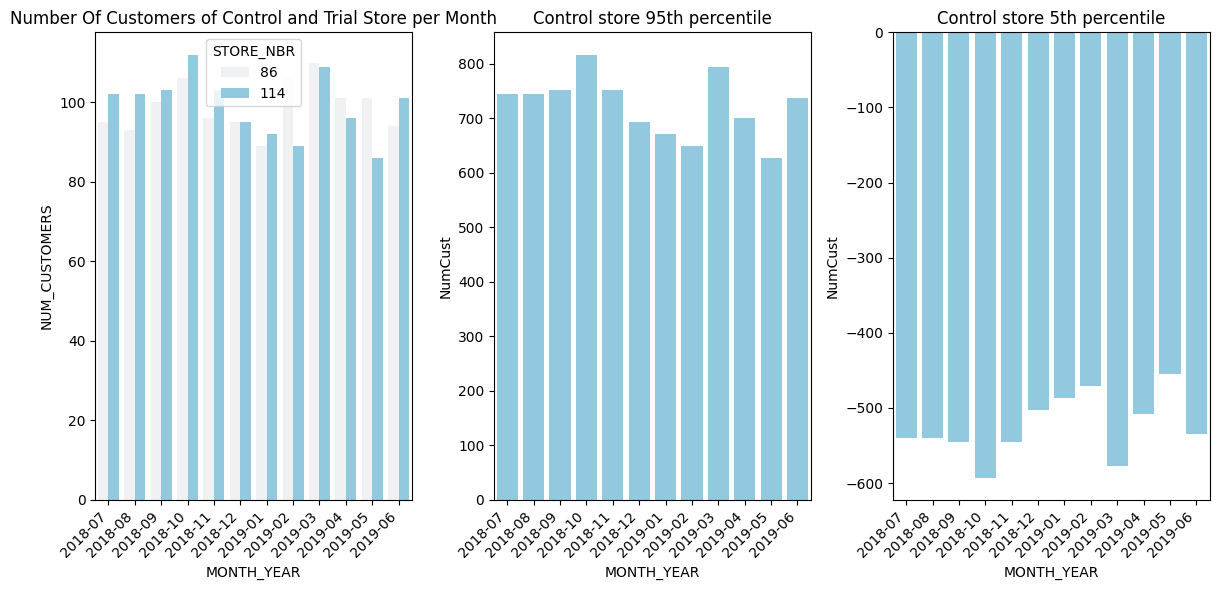

In [68]:
# Create plots for each column
plt.figure(figsize=(12, 6))

# First plot
plt.subplot(1, 3, 1)
sns.barplot(x='MONTH_YEAR', y='NUM_CUSTOMERS', data=measure_over_time_num_cust_new, hue='STORE_NBR', estimator=sum,errorbar=None, color='skyblue')
plt.title('Number Of Customers of Control and Trial Store per Month')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Second plot
plt.subplot(1, 3, 2)
sns.barplot(x='MONTH_YEAR', y='NumCust', data=past_custs_controls_95, estimator=sum,errorbar=None, color='skyblue')
plt.title('Control store 95th percentile')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Third plot
plt.subplot(1, 3, 3)
sns.barplot(x='MONTH_YEAR', y='NumCust', data=past_custs_controls_5, estimator=sum,errorbar=None, color='skyblue')
plt.title('Control store 5th percentile')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The trial significantly increased customer numbers in trial store 86 over three months, indicating a positive impact on sales. However, sales were not significantly higher. The Category Manager should investigate if special deals in the trial store, potentially resulting in lower prices, affected the results.

#### Trial Store 88

Repeat all the processes for the trial store 88.

In [ ]:
# Compare trial store 86 against control stores
total_sales_88_corr = calculate_correlation(88, 'TOTAL_SALES')
total_sales_88_diff = calculate_difference(88,'TOTAL_SALES')
number_cust_88_corr = calculate_correlation(88, 'NUM_CUSTOMERS')
number_cust_88_diff = calculate_difference(88, 'NUM_CUSTOMERS')

In [70]:
# Merge 2 scores dataset for total sales
merged_scores_sales = pd.merge(total_sales_88_corr, total_sales_88_diff, on='Control_Store')

# Calculate the composed of correlation and magnitude
merged_scores_sales['Combined Score Sales'] = 0.5 * merged_scores_sales['Correlation'] + 0.5 * merged_scores_sales['Distance']

# Merge 2 scores dataset for customer number
merged_scores_cust = pd.merge(number_cust_88_corr, number_cust_88_diff, on='Control_Store')

# Calculate the composed of correlation and magnitude
merged_scores_cust['Combined Score Customers'] = 0.5 * merged_scores_cust['Correlation'] + 0.5 * merged_scores_cust['Distance']

In [71]:
# Merge 2 scores dataset
merged_scores = pd.merge(merged_scores_sales, merged_scores_cust, on='Control_Store')

# Calculate the composed of correlation and magnitude
merged_scores['Combined Score'] = 0.5 * merged_scores['Combined Score Sales'] + 0.5 * merged_scores['Combined Score Customers']

# Sort DataFrame
merged_scores = merged_scores.sort_values(by=['Combined Score'], ascending=False)

In [72]:
# Check DataFrame
merged_scores.head()

,Control_Store,Correlation_x,Distance_x,Combined Score Sales,Correlation_y,Distance_y,Combined Score Customers,Combined Score
231,237,0.109878,0.458114,0.283996,0.958896,0.463931,0.711413,0.497705
118,123,0.402339,0.344941,0.373640,0.660125,0.399249,0.529687,0.451663
13,14,0.599664,0.039612,0.319638,0.975727,0.012810,0.494269,0.406953
251,257,0.359999,0.227015,0.293507,0.624086,0.343271,0.483678,0.388593
173,178,0.270828,0.152206,0.211517,0.923545,0.138131,0.530838,0.371177


In [73]:
# Create DataFrame for visualization
visual_data = df_metrics[((df_metrics['STORE_NBR'] == 88) | (df_metrics['STORE_NBR'] == 237)) & (df_metrics['MONTH_YEAR'] < '2019-02')]

In [74]:
# Check DataFrame
visual_data

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT
1001,88,2018-07,1218.2,124,144,288,8.459722
1002,88,2018-08,1242.2,125,152,287,8.172368
1003,88,2018-09,1361.8,121,153,306,8.900654
1004,88,2018-10,1270.8,120,150,300,8.472000
1005,88,2018-11,1311.4,123,150,300,8.742667
1006,88,2018-12,1213.0,120,138,276,8.789855
1007,88,2019-01,1215.4,115,141,282,8.619858
2744,237,2018-07,1387.2,125,156,312,8.892308
2745,237,2018-08,1321.9,132,161,304,8.210559
2746,237,2018-09,1250.8,120,143,285,8.746853


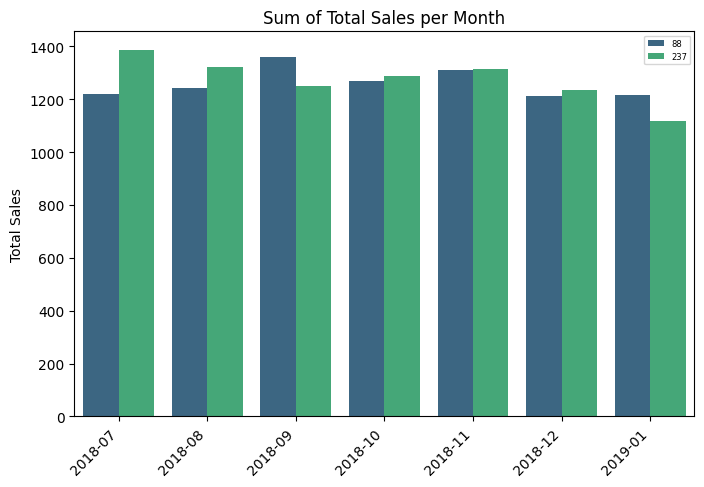

In [75]:
# Plotting sum of total sales per month
plt.figure(figsize=(8, 5))
sns.barplot(x='MONTH_YEAR', y='TOTAL_SALES', data=visual_data, estimator='sum', errorbar=None, hue='STORE_NBR',palette='viridis')

# Customize the plot
plt.title('Sum of Total Sales per Month')
plt.ylabel('Total Sales')
plt.xlabel(None)
plt.legend(loc ="upper right",  prop = { "size": 6 })

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

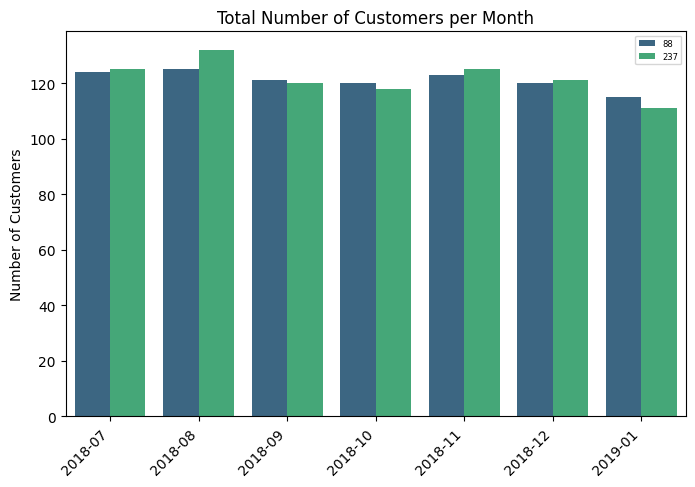

In [76]:
# Plotting number of customers per month
plt.figure(figsize=(8, 5))
sns.barplot(x='MONTH_YEAR', y='NUM_CUSTOMERS', data=visual_data, estimator='sum', errorbar=None, hue='STORE_NBR',palette='viridis')

# Customize the plot
plt.title('Total Number of Customers per Month')
plt.ylabel('Number of Customers')
plt.xlabel(None)
plt.legend(loc ="upper right",  prop = { "size": 6 })

# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

In [77]:
# Selecting the pre-trial period data for the control store (store 237)
pre_trial_control = df_metrics[(df_metrics['STORE_NBR'] == 237) & (df_metrics['MONTH_YEAR'] < '02-2019')]

# Selecting the pre-trial period data for the trial store (store 88)
pre_trial_trial = df_metrics[(df_metrics['STORE_NBR'] == 88) & (df_metrics['MONTH_YEAR'] < '02-2019')]

# Calculating the scaling factor to match control store sales to trial store sales
scaling_factor = pre_trial_trial['TOTAL_SALES'].sum() / pre_trial_control['TOTAL_SALES'].sum()

# Apply the scaling factor
measure_over_time_sales = df_metrics.copy()
measure_over_time_sales['controlSales'] = measure_over_time_sales.loc[
    measure_over_time_sales['STORE_NBR'] == 237, 'TOTAL_SALES'
] * scaling_factor

In [78]:
measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 237]

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT,controlSales
2744,237,2018-07,1387.2,125,156,312,8.892308,1374.394024
2745,237,2018-08,1321.9,132,161,304,8.210559,1309.696842
2746,237,2018-09,1250.8,120,143,285,8.746853,1239.253204
2747,237,2018-10,1287.1,118,144,287,8.938194,1275.218100
2748,237,2018-11,1316.0,125,153,304,8.601307,1303.851308
2749,237,2018-12,1234.4,121,142,283,8.692958,1223.004601
2750,237,2019-01,1117.7,111,129,257,8.664341,1107.381921
2751,237,2019-02,1313.0,119,148,296,8.871622,1300.879003
2752,237,2019-03,1177.6,116,134,268,8.788060,1166.728952
2753,237,2019-04,1153.6,116,131,262,8.806107,1142.950509


In [79]:
# Assuming you have a DataFrame named measure_over_time_sales

# Find the indices for the control and trial stores
control_index = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 237].index
trial_index = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 88].index

# Calculate the percentage difference
measure_over_time_sales.loc[control_index, 'PERCENTAGE_DIFF'] = (measure_over_time_sales.loc[trial_index, 'TOTAL_SALES'].values - measure_over_time_sales.loc[control_index, 'controlSales'].values) / measure_over_time_sales.loc[control_index, 'controlSales'].values * 100

In [80]:
# Calculate the standard deviation based on the scaled percentage difference in the pre-trial period
std_dev = measure_over_time_sales.loc[measure_over_time_sales['MONTH_YEAR'] < '02-2019', 'PERCENTAGE_DIFF'].std()

# Number of months in the pre-trial period
num_months = 8

# Degrees of freedom
degrees_of_freedom = num_months - 1

# Calculate t-values for the trial months
measure_over_time_sales['tValue'] = (measure_over_time_sales[(measure_over_time_sales['MONTH_YEAR'] >= '02-2019') & (measure_over_time_sales['MONTH_YEAR'] <= '04-2019')]['PERCENTAGE_DIFF'] - 0) / std_dev

# Find the 95th percentile of the t distribution
critical_value = stats.t.ppf(0.95, degrees_of_freedom)

# Check whether the hypothesis is statistically significant
measure_over_time_sales['Hypothesis_Test'] = abs(measure_over_time_sales['tValue']) > critical_value

In [81]:
measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == 237]

,STORE_NBR,MONTH_YEAR,TOTAL_SALES,NUM_CUSTOMERS,TRANSACTIONS_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_UNIT,controlSales,PERCENTAGE_DIFF,tValue,Hypothesis_Test
2744,237,2018-07,1387.2,125,156,312,8.892308,1374.394024,-11.364574,NaN,False
2745,237,2018-08,1321.9,132,161,304,8.210559,1309.696842,-5.153623,NaN,False
2746,237,2018-09,1250.8,120,143,285,8.746853,1239.253204,9.888762,NaN,False
2747,237,2018-10,1287.1,118,144,287,8.938194,1275.218100,-0.346458,NaN,False
2748,237,2018-11,1316.0,125,153,304,8.601307,1303.851308,0.578953,NaN,False
2749,237,2018-12,1234.4,121,142,283,8.692958,1223.004601,-0.818035,NaN,False
2750,237,2019-01,1117.7,111,129,257,8.664341,1107.381921,9.754365,NaN,False
2751,237,2019-02,1313.0,119,148,296,8.871622,1300.879003,2.976526,0.390360,False
2752,237,2019-03,1177.6,116,134,268,8.788060,1166.728952,25.736144,3.375193,True
2753,237,2019-04,1153.6,116,131,262,8.806107,1142.950509,15.228086,1.997103,True


In [82]:
# Create new DataFrame
measure_over_time_sales_new = measure_over_time_sales[(measure_over_time_sales['STORE_NBR'] == 88) | (measure_over_time_sales['STORE_NBR'] == 237)][['STORE_NBR','MONTH_YEAR','TOTAL_SALES']]

# Control store 95th percentile
past_sales_controls_95 = measure_over_time_sales_new[measure_over_time_sales_new['STORE_NBR'] == 237].copy()
past_sales_controls_95['totSales'] = past_sales_controls_95['TOTAL_SALES'] * (1 + std_dev * 2)
past_sales_controls_95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
past_sales_controls_5 = measure_over_time_sales_new[measure_over_time_sales_new['STORE_NBR'] == 237].copy()
past_sales_controls_5['totSales'] = past_sales_controls_5['TOTAL_SALES'] * (1 - std_dev * 2)
past_sales_controls_5['Store_type'] = 'Control 5th % confidence interval'

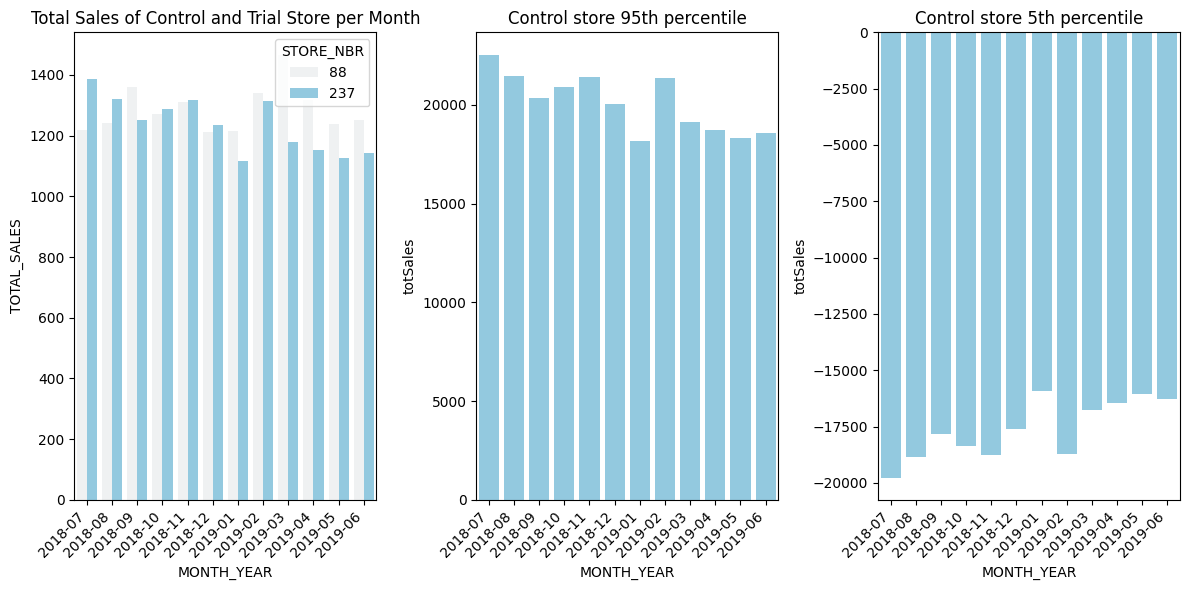

In [83]:
# Create plots for each column
plt.figure(figsize=(12, 6))

# First plot
plt.subplot(1, 3, 1)
sns.barplot(x='MONTH_YEAR', y='TOTAL_SALES', data=measure_over_time_sales_new, hue='STORE_NBR', estimator=sum,errorbar=None, color='skyblue')
plt.title('Total Sales of Control and Trial Store per Month')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Second plot
plt.subplot(1, 3, 2)
sns.barplot(x='MONTH_YEAR', y='totSales', data=past_sales_controls_95, estimator=sum,errorbar=None, color='skyblue')
plt.title('Control store 95th percentile')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Third plot
plt.subplot(1, 3, 3)
sns.barplot(x='MONTH_YEAR', y='totSales', data=past_sales_controls_5, estimator=sum,errorbar=None, color='skyblue')
plt.title('Control store 5th percentile')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### Customer Number

In [84]:
# Selecting the pre-trial period data for the control store (store 237)
pre_trial_control = df_metrics[(df_metrics['STORE_NBR'] == 237) & (df_metrics['MONTH_YEAR'] < '02-2019')]

# Selecting the pre-trial period data for the trial store (store 88)
pre_trial_trial = df_metrics[(df_metrics['STORE_NBR'] == 88) & (df_metrics['MONTH_YEAR'] < '02-2019')]

# Calculating the scaling factor to match control store number of customers to trial store number of customers
scaling_factor = pre_trial_trial['NUM_CUSTOMERS'].sum() / pre_trial_control['NUM_CUSTOMERS'].sum()

# Apply the scaling factor
measure_over_time_num_cust = df_metrics.copy()
measure_over_time_num_cust['controlCustNum'] = measure_over_time_num_cust.loc[
    measure_over_time_num_cust['STORE_NBR'] == 237, 'NUM_CUSTOMERS'
] * scaling_factor

In [85]:
# Assuming you have a DataFrame named measure_over_time_sales

# Find the indices for the control and trial stores
control_index = measure_over_time_num_cust[measure_over_time_num_cust['STORE_NBR'] == 237].index
trial_index = measure_over_time_num_cust[measure_over_time_num_cust['STORE_NBR'] == 88].index

# Calculate the percentage difference
measure_over_time_num_cust.loc[control_index, 'PERCENTAGE_DIFF'] = (measure_over_time_num_cust.loc[trial_index, 'NUM_CUSTOMERS'].values - measure_over_time_num_cust.loc[control_index, 'controlCustNum'].values) / measure_over_time_num_cust.loc[control_index, 'controlCustNum'].values * 100

In [86]:
# Calculate the standard deviation based on the scaled percentage difference in the pre-trial period
std_dev = measure_over_time_num_cust.loc[measure_over_time_num_cust['MONTH_YEAR'] < '02-2019', 'PERCENTAGE_DIFF'].std()

# Number of months in the pre-trial period
num_months = 8

# Degrees of freedom
degrees_of_freedom = num_months - 1

# Calculate t-values for the trial months
measure_over_time_num_cust['tValue'] = (measure_over_time_num_cust[(measure_over_time_num_cust['MONTH_YEAR'] >= '02-2019') & (measure_over_time_num_cust['MONTH_YEAR'] <= '04-2019')]['PERCENTAGE_DIFF'] - 0) / std_dev

# Find the 95th percentile of the t distribution
critical_value = stats.t.ppf(0.95, degrees_of_freedom)

# Check whether the hypothesis is statistically significant
measure_over_time_num_cust['Hypothesis_Test'] = abs(measure_over_time_num_cust['tValue']) > critical_value

In [87]:
# Create new DataFrame
measure_over_time_num_cust_new = measure_over_time_num_cust[(measure_over_time_num_cust['STORE_NBR'] == 88) | (measure_over_time_num_cust['STORE_NBR'] == 237)][['STORE_NBR','MONTH_YEAR','NUM_CUSTOMERS']]

# Control store 95th percentile
past_custs_controls_95 = measure_over_time_num_cust_new[measure_over_time_num_cust_new['STORE_NBR'] == 237].copy()
past_custs_controls_95['NumCust'] = past_custs_controls_95['NUM_CUSTOMERS'] * (1 + std_dev * 2)
past_custs_controls_95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
past_custs_controls_5 = measure_over_time_num_cust_new[measure_over_time_num_cust_new['STORE_NBR'] == 237].copy()
past_custs_controls_5['NumCust'] = past_custs_controls_5['NUM_CUSTOMERS'] * (1 - std_dev * 2)
past_custs_controls_5['Store_type'] = 'Control 5th % confidence interval'

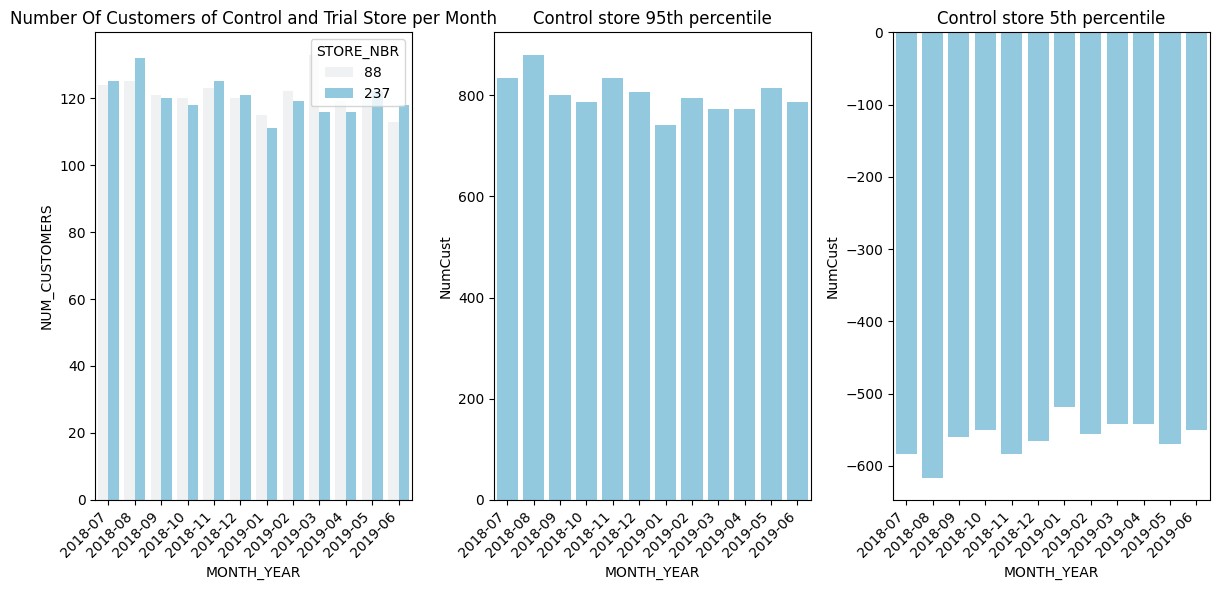

In [88]:
# Create plots for each column
plt.figure(figsize=(12, 6))

# First plot
plt.subplot(1, 3, 1)
sns.barplot(x='MONTH_YEAR', y='NUM_CUSTOMERS', data=measure_over_time_num_cust_new, hue='STORE_NBR', estimator=sum,errorbar=None, color='skyblue')
plt.title('Number Of Customers of Control and Trial Store per Month')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Second plot
plt.subplot(1, 3, 2)
sns.barplot(x='MONTH_YEAR', y='NumCust', data=past_custs_controls_95, estimator=sum,errorbar=None, color='skyblue')
plt.title('Control store 95th percentile')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Third plot
plt.subplot(1, 3, 3)
sns.barplot(x='MONTH_YEAR', y='NumCust', data=past_custs_controls_5, estimator=sum,errorbar=None, color='skyblue')
plt.title('Control store 5th percentile')
# Optionally, rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

We've found control stores 233, 114, 237 for trial stores 77, 86 and 88
respectively. The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in
sales. Now that we have finished our analysis, we can prepare our presentation to the Category Manager.